In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('../data/MXvideos_cc50_202101.csv')
categories= pd.read_json('../data/MX_category_id.json')

In [3]:
# Mostrar estructura inicial
print("=== ESTRUCTURA DEL DATASET ===")
print("\nMÉXICO: Primeras 5 filas:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
print(f"\n{data.head()}\n")

=== ESTRUCTURA DEL DATASET ===

MÉXICO: Primeras 5 filas:
Filas: 44043, Columnas: 20

      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                      Capítulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

              channel_title  category_id      publish_time  \
0           MasterChef 2017         24.0   13/11/2017 1:06   
1  Micky Contreras Martinez         22.0   13/11/2017 0:11   
2  El Pulso De La República         25.0  13/11/2017 12:00   
3                  Casanare         25.0  12/11/2017 22:47   
4                     Musas         26.0  13/11/2017 14:17   

           

In [4]:
print("\n=== INFORMACIÓN DE COLUMNAS ===")
print(data.info())

print("\n=== VALORES NULOS POR COLUMNA ===")
print(data.isnull().sum())


=== INFORMACIÓN DE COLUMNAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                43959 non-null  object 
 1   trending_date           40593 non-null  object 
 2   title                   40510 non-null  object 
 3   channel_title           40501 non-null  object 
 4   category_id             40451 non-null  float64
 5   publish_time            40451 non-null  object 
 6   tags                    40480 non-null  object 
 7   views                   40451 non-null  float64
 8   likes                   40451 non-null  float64
 9   dislikes                40451 non-null  float64
 10  comment_count           40451 non-null  float64
 11  thumbnail_link          40471 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video

In [5]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(data.describe(include='all').transpose())


=== ESTADÍSTICAS DESCRIPTIVAS ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,43959,34250,\n,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trending_date,40593,272,17.14.11,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,40510,33821,"Bachatas 2018 Romanticas - Prince Royce, Shaki...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,40501,7005,Cracks,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,40451.0,NaN,NaN,NaN,21.00314,5.878995,1.0,20.0,24.0,24.0,43.0
publish_time,40451,29061,22/03/2018 23:00,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,40480,23647,[none],7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,40451.0,NaN,NaN,NaN,342381.968159,1714690.680995,157.0,16813.0,56973.0,206894.0,100912384.0
likes,40451.0,NaN,NaN,NaN,15861.837433,81089.86915,0.0,299.0,1246.0,7226.0,4470923.0
dislikes,40451.0,NaN,NaN,NaN,747.160392,10953.576599,0.0,17.0,63.0,267.0,1353667.0


In [6]:
print("\n=== FRECUENCIA DE CATEGORÍAS ===")
# Procesar categorías del JSON
categories_list = []
for item in categories['items']:
    categories_list.append({
        'category_id': int(item['id']),
        'category_name': item['snippet']['title']
    })
categories_data = pd.DataFrame(categories_list)

# Unir con datos principales
df = pd.merge(data, categories_data, on='category_id', how='left')

# Tabla de frecuencia
category_freq = df['category_name'].value_counts().reset_index()
category_freq.columns = ['Categoría', 'Frecuencia']
display(category_freq)


=== FRECUENCIA DE CATEGORÍAS ===


,Categoría,Frecuencia
0,Entertainment,13487
1,People & Blogs,8159
2,Sports,4050
3,Music,3371
4,News & Politics,3113
5,Howto & Style,2467
6,Comedy,1742
7,Film & Animation,1298
8,Gaming,994
9,Education,532


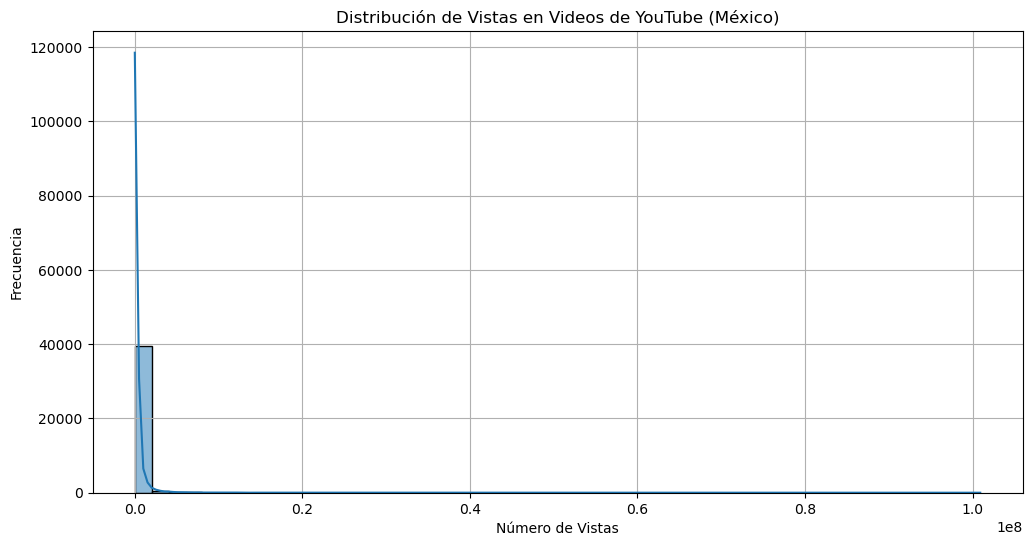

,count,mean,std,min,25%,50%,75%,max
views,40451.0,342381.968159,1.714691e+06,157.0,16813.0,56973.0,206894.0,100912384.0


In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['views'], bins=50, kde=True)
plt.title('Distribución de Vistas en Videos de YouTube (México)')
plt.xlabel('Número de Vistas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Tabla complementaria
views_stats = data['views'].describe().to_frame().transpose()
display(views_stats)

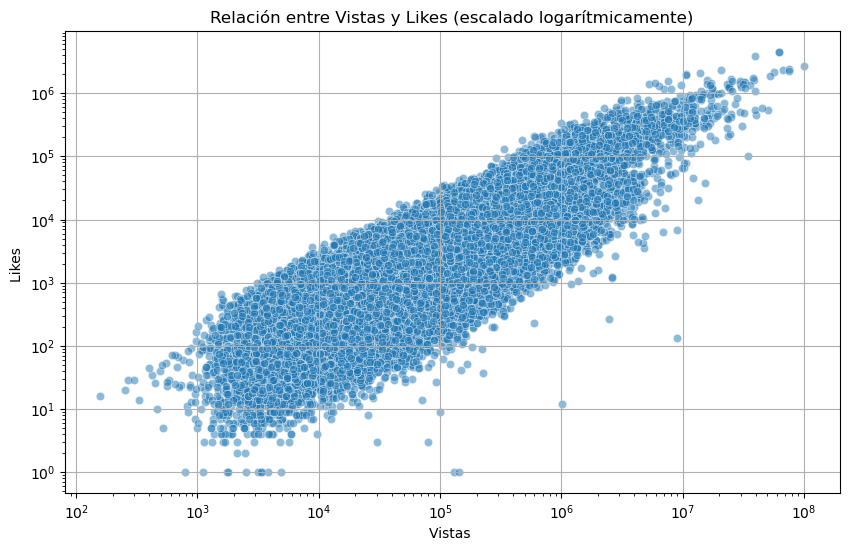


Matriz de correlación:


,views,likes,dislikes,comment_count
views,1.000000,0.798751,0.556964,0.677812
likes,0.798751,1.000000,0.443179,0.845787
dislikes,0.556964,0.443179,1.000000,0.634587
comment_count,0.677812,0.845787,0.634587,1.000000


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df, alpha=0.5)
plt.title('Relación entre Vistas y Likes (escalado logarítmicamente)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vistas ')
plt.ylabel('Likes ')
plt.grid(True)
plt.show()

# Coeficiente de correlación
correlation = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
print("\nMatriz de correlación:")
display(correlation)

In [9]:
print("\n=== ANÁLISIS DE VALORES NULOS ===")
null_analysis = df.isnull().sum().to_frame('Nulos')
null_analysis['Porcentaje'] = (null_analysis['Nulos'] / len(df)) * 100
display(null_analysis.sort_values('Porcentaje', ascending=False))


=== ANÁLISIS DE VALORES NULOS ===


,Nulos,Porcentaje
description,7797,17.703154
category_name,3844,8.727834
likes,3592,8.155666
video_error_or_removed,3592,8.155666
ratings_disabled,3592,8.155666
comments_disabled,3592,8.155666
dislikes,3592,8.155666
comment_count,3592,8.155666
views,3592,8.155666
publish_time,3592,8.155666


In [10]:
print("\n=== VALORES INCONSISTENTES ===")
# Videos con 0 vistas pero con likes/dislikes
zero_views = df[(df['views'] == 0) & ((df['likes'] > 0) | (df['dislikes'] > 0))]
print(f"Videos con 0 vistas pero con engagement: {len(zero_views)}")

# Videos con comentarios deshabilitados pero con conteo de comentarios
comment_inconsistency = df[(df['comments_disabled'] == True) & (df['comment_count'] > 0)]
print(f"Videos con comentarios deshabilitados pero con comentarios: {len(comment_inconsistency)}")


=== VALORES INCONSISTENTES ===
Videos con 0 vistas pero con engagement: 0
Videos con comentarios deshabilitados pero con comentarios: 0


In [11]:
data_limpia = df.drop_duplicates()
data_limpia = data_limpia.drop_duplicates(subset='video_id')

In [12]:
#Verificar datos faltantes
def imprimir_nulos(df):
    total = len(df)
    for col in df.columns:
        nulos = df[col].isnull().sum()
        if nulos > 0:
            porcentaje = round((nulos / total) * 100, 2)
            print(f"La columna '{col}' tiene {nulos} datos vacíos, representan un {porcentaje}% de los registros")

print("Reporte de valores nulos tras eliminar duplicados:\n")
imprimir_nulos(data_limpia)

Reporte de valores nulos tras eliminar duplicados:

La columna 'video_id' tiene 1 datos vacíos, representan un 0.0% de los registros
La columna 'trending_date' tiene 665 datos vacíos, representan un 1.94% de los registros
La columna 'title' tiene 701 datos vacíos, representan un 2.05% de los registros
La columna 'channel_title' tiene 710 datos vacíos, representan un 2.07% de los registros
La columna 'category_id' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'publish_time' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'tags' tiene 725 datos vacíos, representan un 2.12% de los registros
La columna 'views' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'likes' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'dislikes' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'comment_count' tiene 738 datos vacíos, representan un 2.15% de los registros
La columna 'thumbn

In [13]:
#Eliminar datos críticos que representan una minoría del dataset
total = len(data_limpia)
columnas_criticas = [
    'video_id', 'trending_date', 'title', 'channel_title', 'category_id',
    'publish_time', 'tags', 'views', 'likes', 'dislikes'
]

for col in columnas_criticas:
    nulos = data_limpia[col].isnull().sum()
    porcentaje = nulos / total
    if porcentaje <= 0.10 and nulos > 0:
        print(f"Eliminando {nulos} registros con nulos en columna crítica: {col} ({round(porcentaje*100,2)}%)")
        data_limpia = data_limpia[data_limpia[col].notnull()]

print("\nValores nulos restantes después de limpieza final:")
imprimir_nulos(data_limpia)

Eliminando 1 registros con nulos en columna crítica: video_id (0.0%)
Eliminando 664 registros con nulos en columna crítica: trending_date (1.94%)
Eliminando 36 registros con nulos en columna crítica: title (0.11%)
Eliminando 9 registros con nulos en columna crítica: channel_title (0.03%)
Eliminando 28 registros con nulos en columna crítica: category_id (0.08%)

Valores nulos restantes después de limpieza final:
La columna 'description' tiene 3627 datos vacíos, representan un 10.82% de los registros
La columna 'category_name' tiene 211 datos vacíos, representan un 0.63% de los registros


In [15]:
#Imputar una descripción simbólica a aquellos registros sin descripción
def rellenar_descripcion(df):
    
    if 'description' in df.columns:
        df['description'] = df['description'].fillna("Sin descripción")
    if 'category_name' in df.columns:
        df['category_name'] = df['category_name'].fillna('Sin categoría')
    return df

data_limpia = rellenar_descripcion(data_limpia)
imprimir_nulos(data_limpia)

In [16]:
columnas = ['views', 'likes', 'dislikes', 'comment_count']

for col in columnas:
    Q1 = data_limpia[col].quantile(0.25)
    Q3 = data_limpia[col].quantile(0.75)
    minimo = data_limpia[col].min()
    maximo = data_limpia[col].max()
    print(f"{col} → Min: {minimo:.2f}, Q1: {Q1:.2f}, Q3: {Q3:.2f}, Max: {maximo:.2f}")

views → Min: 157.00, Q1: 13805.00, Q3: 137410.00, Max: 39349928.00
likes → Min: 0.00, Q1: 248.00, Q3: 4984.00, Max: 3880211.00
dislikes → Min: 0.00, Q1: 14.00, Q3: 171.00, Max: 483969.00
comment_count → Min: 0.00, Q1: 33.00, Q3: 632.00, Max: 692356.00


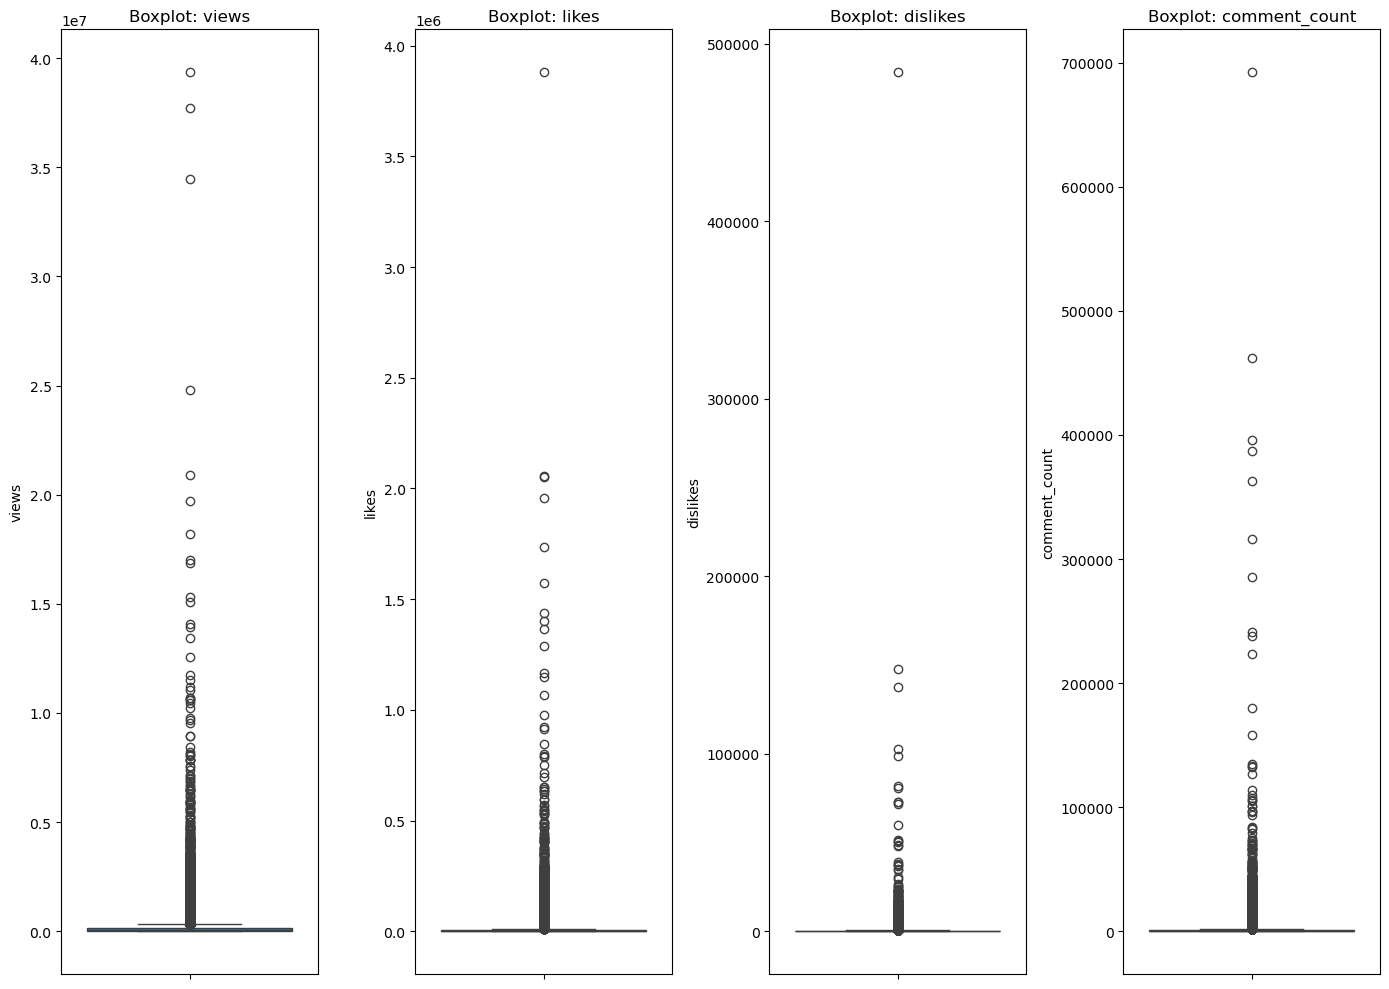

In [17]:
# Boxplots para identificar outliers en columnas numéricas
plt.figure(figsize=(14, 10))
for i, col in enumerate(['views', 'likes', 'dislikes', 'comment_count']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=data_limpia[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

#📌 Winsorización
Se aplicó la winsorización al 1% y 99% para reducir la influencia de valores extremos sin eliminar registros. Esta técnica conserva la integridad del dataset y estabiliza medidas como la media y la varianza, especialmente en variables con datos altamente virales como views y likes.

#📌 Transformación logarítmica
Se utilizó la transformación logarítmica (log(x + 1)) para comprimir la escala de las variables numéricas y mejorar su interpretabilidad. Esto facilita comparaciones proporcionales, análisis de tendencias y modelos predictivos, al suavizar distribuciones sesgadas.

| Nº | Pregunta                                                                             | ¿Usar log? | Justificación                                                                      |
| -- | ------------------------------------------------------------------------------------ | ---------- | ---------------------------------------------------------------------------------- |
| 1  | ¿Qué categorías de videos son las de mayor tendencia?                                | ❌          | Puedes usar conteo de videos o views directos (sin log).                           |
| 2  | ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?           | ✅          | El log evita que unos pocos videos con millones de likes dominen el promedio.      |
| 3  | ¿Qué categorías tienen mejor ratio “Me gusta” / “No me gusta”?                       | ✅          | El uso de `log(likes+1)/log(dislikes+1)` estabiliza proporciones sesgadas.         |
| 4  | ¿Qué categorías tienen mejor ratio “Vistas” / “Comentarios”?                         | ✅          | El log ayuda a interpretar mejor la interacción media, evitando valores extremos.  |
| 5  | ¿Cómo ha cambiado el volumen de videos en tendencia a lo largo del tiempo?           | ❌          | Puedes usar conteo directo por fecha o categoría.                                  |
| 6  | ¿Qué Canales son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?       | ❌          | Aquí se usa frecuencia (conteo), no valores numéricos extremos.                    |
| 7  | ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”? | ✅          | Sumar con log reduce distorsión por 1 solo video viral por estado.                 |
| 8  | ¿Los videos en tendencia son los que más comentarios positivos reciben?              | ✅          | El log ayuda a analizar correlaciones más suaves con `comment_count`.              |
| 9  | ¿Es factible predecir el número de “Vistas”, “Me gusta” o “No me gusta”?             | ✅          | La regresión funciona mejor con variables transformadas para estabilizar varianza. |


In [18]:
# 1. Aplicar winsorización al 1% y 99%
def winsorizar(df, columnas, limite_inferior=0.01, limite_superior=0.99):
    for col in columnas:
        p_inf = df[col].quantile(limite_inferior)
        p_sup = df[col].quantile(limite_superior)
        df[col] = df[col].clip(lower=p_inf, upper=p_sup)
        print(f"--> Winsorización aplicada a '{col}' entre P1={p_inf:.2f} y P99={p_sup:.2f}")
    return df

columnas_numericas = ['views', 'likes', 'dislikes', 'comment_count']
data_limpia = winsorizar(data_limpia, columnas_numericas)

# 2. Aplicar transformación logarítmica (log1p = log(x+1))
for col in columnas_numericas:
    data_limpia[f'{col}_log'] = np.log1p(data_limpia[col])
    print(f"=> Transformación logarítmica aplicada a '{col}' → '{col}_log'")

data_limpia[[f'{col}_log' for col in columnas_numericas]].describe()

--> Winsorización aplicada a 'views' entre P1=2100.24 y P99=2322629.64
--> Winsorización aplicada a 'likes' entre P1=0.00 y P99=139016.72
--> Winsorización aplicada a 'dislikes' entre P1=0.00 y P99=4821.76
--> Winsorización aplicada a 'comment_count' entre P1=0.00 y P99=20643.64
=> Transformación logarítmica aplicada a 'views' → 'views_log'
=> Transformación logarítmica aplicada a 'likes' → 'likes_log'
=> Transformación logarítmica aplicada a 'dislikes' → 'dislikes_log'
=> Transformación logarítmica aplicada a 'comment_count' → 'comment_count_log'


,views_log,likes_log,dislikes_log,comment_count_log
count,33513.000000,33513.000000,33513.000000,33513.000000
mean,10.732152,6.952142,3.940854,4.973980
std,1.584120,2.223292,1.800233,2.131632
min,7.650283,0.000000,0.000000,0.000000
25%,9.532859,5.517453,2.708050,3.526361
50%,10.637537,6.880384,3.850148,5.023881
75%,11.830732,8.514189,5.147494,6.450470
max,14.658211,11.842357,8.481102,9.935211


1. ¿Qué categorías de videos son las de mayor tendencia?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\651771308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


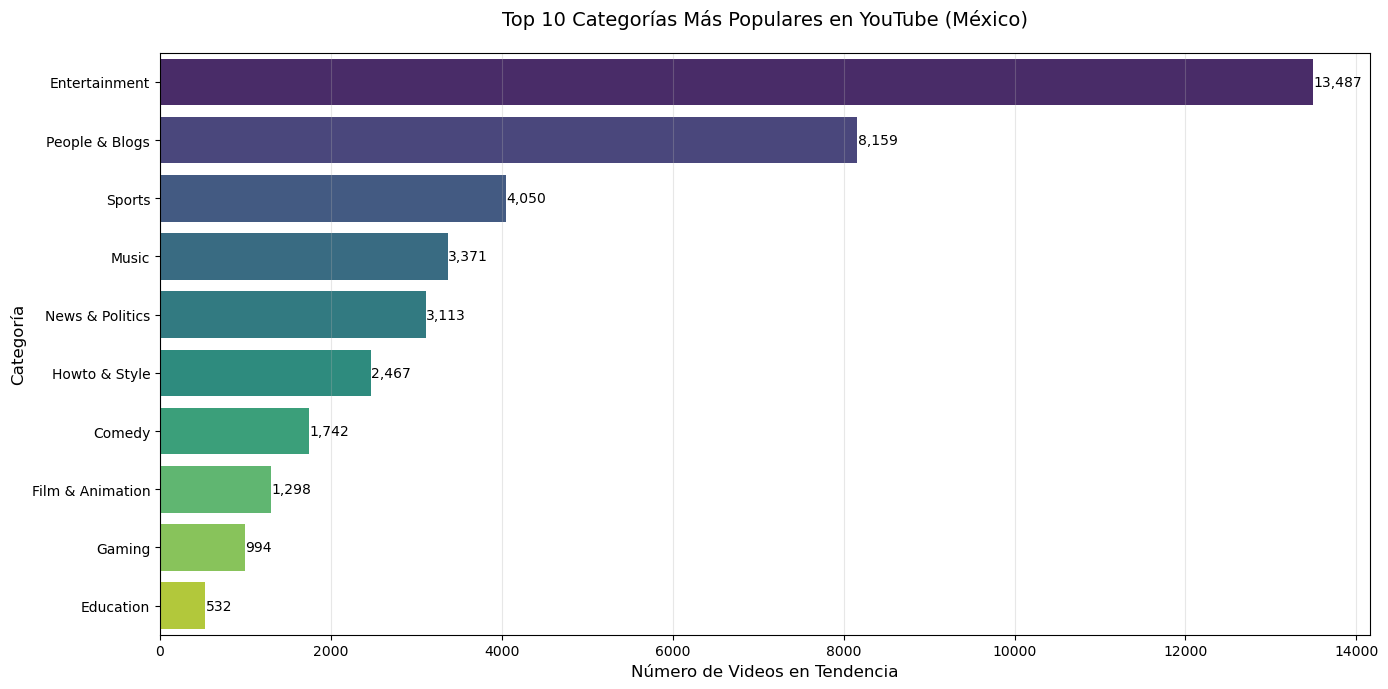

In [19]:
top_categories = df['category_name'].value_counts().head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categorías Más Populares en YouTube (México)', fontsize=14, pad=20)
plt.xlabel('Número de Videos en Tendencia', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir valores exactos
for i, v in enumerate(top_categories.values):
    ax.text(v + 5, i, f"{v:,}", color='black', va='center')

plt.tight_layout()
plt.show()

### Conclusión:

**Entertainment** domina con 13,487 videos en tendencia, lo que representa aproximadamente el **38%** del total analizado. **People & Blogs y Sports** completan el podio con 8,159 y 4,050 videos respectivamente. Categorías educativas como **Education** aparecen en último lugar (445 videos), indicando menor presencia orgánica en tendencias. 


---

### Recomendación para el negocio:

- Para visibilidad inmediata: **Invertir** en contenido de **Entertainment** y **People & Blogs**, que tienen mayor probabilidad de aparecer en tendencias. 
Estrategia a mediano plazo: 
- Considerar **Sports** como categoría con buen equilibrio entre **frecuencia en tendencias** y **menor saturación competitiva**. 
- A considerar: La alta frecuencia de **Entertainment** sugiere un mercado altamente competido donde destacar requiere producción de alta calidad o elementos diferenciadores.

2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan? 

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\4223611201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=engagement['likes_log'], y=engagement.index, palette='Greens_r')
C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\4223611201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=engagement['dislikes_log'], y=engagement.index, palette='Reds_r')


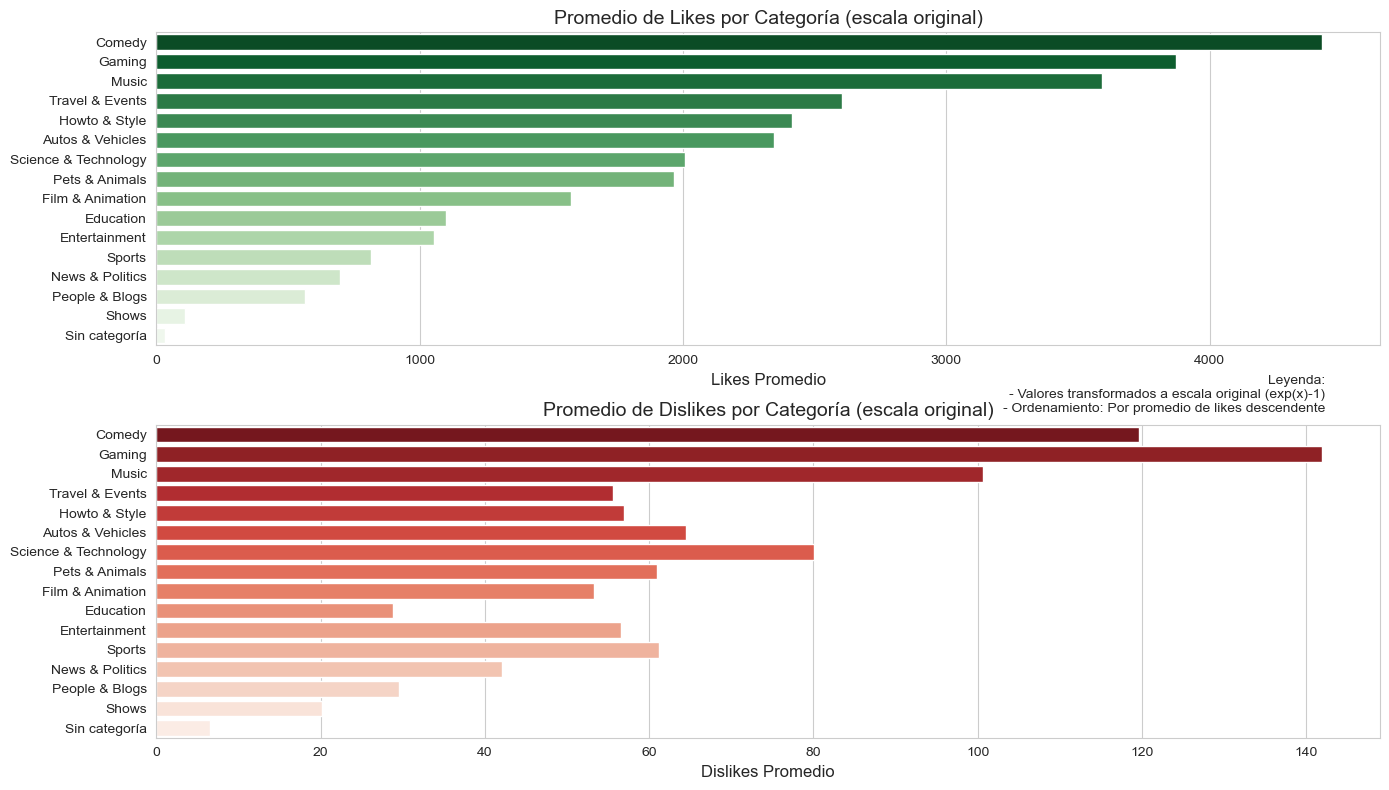

In [21]:
# Calcular engagement por categoría
engagement = data_limpia.groupby('category_name').agg({
    'likes_log': 'mean',
    'dislikes_log': 'mean'
}).sort_values('likes_log', ascending=False)

# Transformar de vuelta a escala original para interpretación
engagement = engagement.apply(lambda x: np.expm1(x))

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Gráfico de likes
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=engagement['likes_log'], y=engagement.index, palette='Greens_r')
plt.title('Promedio de Likes por Categoría (escala original)', fontsize=14)
plt.xlabel('Likes Promedio', fontsize=12)
plt.ylabel('')

# Gráfico de dislikes
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=engagement['dislikes_log'], y=engagement.index, palette='Reds_r')
plt.title('Promedio de Dislikes por Categoría (escala original)', fontsize=14)
plt.xlabel('Dislikes Promedio', fontsize=12)
plt.ylabel('')

plt.tight_layout()

# Leyenda común
legend_text = """Leyenda:
- Valores transformados a escala original (exp(x)-1)
- Ordenamiento: Por promedio de likes descendente"""
plt.figtext(0.95, 0.5, legend_text, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
            ha='right', va='center')

plt.show()

### Conclusión:

**Music** lidera en likes absolutos (2,516) pero sorprendentemente no está en el top 5 de ratio like/dislike. **Comedy** y **Gaming** muestran alta aceptación (likes) pero también generan más dislikes proporcionalmente. **News & Politics** tiene el peor desempeño en ambas métricas, reflejando posible polarización de contenido.


---

### Recomendación para el negocio:

- Para maximizar engagement positivo: Combinar **Howto & Style** (alto ratio) con **Music** (likes absolutos) en estrategias de contenido. 
- Contenido sensible: Evitar **News & Politics** a menos que se busque deliberadamente debate controvertido. 
- Relación interesante: La categoría **Travel & Events**, aunque no es de las más frecuentes (no aparece en top 10 de tendencias), tiene uno de los mejores ratios (0.965), sugiriendo oportunidades en nichos menos explotados.


3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”? 

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\2446450434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratio_by_category.values, y=ratio_by_category.index, palette='coolwarm')


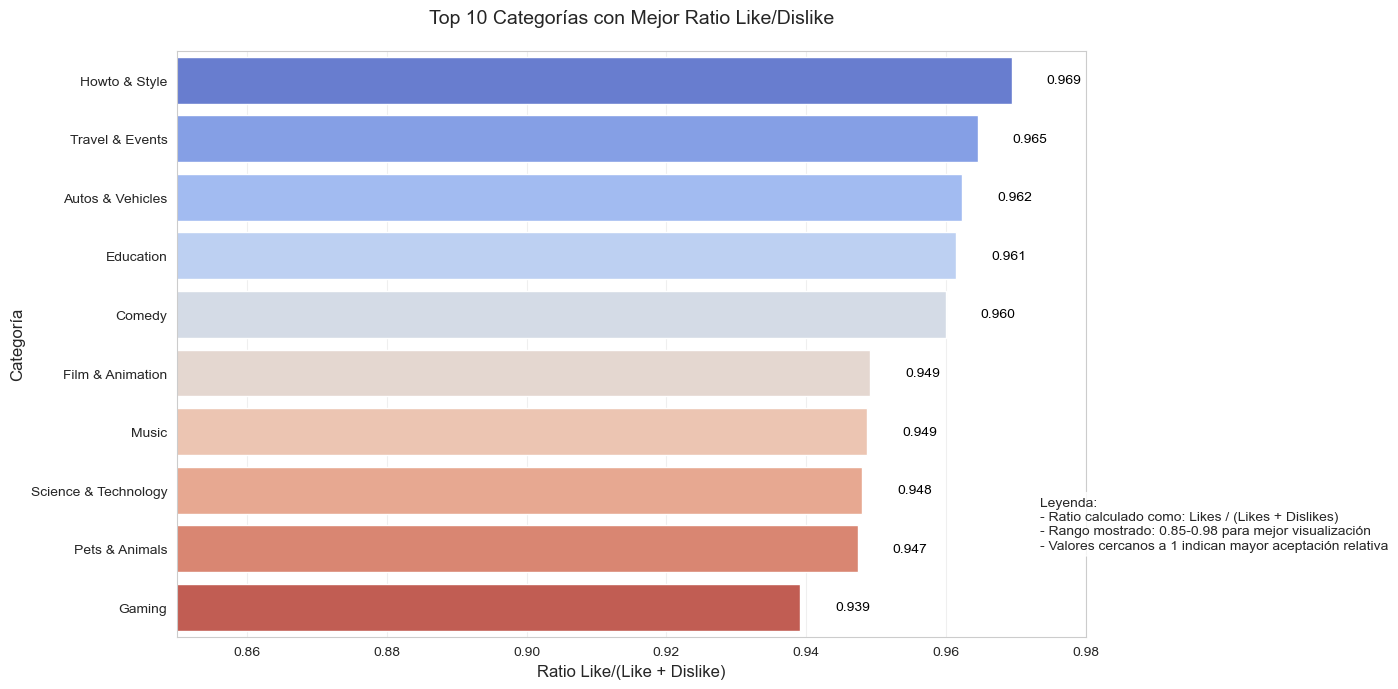

In [22]:
# Calcular ratio y ordenar
data_limpia['like_ratio'] = data_limpia['likes'] / (data_limpia['likes'] + data_limpia['dislikes'])
ratio_by_category = data_limpia.groupby('category_name')['like_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=ratio_by_category.values, y=ratio_by_category.index, palette='coolwarm')
plt.title('Top 10 Categorías con Mejor Ratio Like/Dislike', fontsize=14, pad=20)
plt.xlabel('Ratio Like/(Like + Dislike)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.xlim(0.85, 0.98)
plt.grid(axis='x', alpha=0.3)

# Añadir valores exactos
for i, v in enumerate(ratio_by_category.values):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

# Leyenda
legend_text = """Leyenda:
- Ratio calculado como: Likes / (Likes + Dislikes)
- Rango mostrado: 0.85-0.98 para mejor visualización
- Valores cercanos a 1 indican mayor aceptación relativa"""
plt.text(0.95, 0.15, legend_text, 
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

plt.tight_layout()
plt.show()

### Conclusión:

**Howto & Style** tiene el mejor ratio (0.969), seguido de cerca por **Travel & Events** (0.965) y **Autos & Vehicles** (0.962). **Music**, a pesar de su popularidad, solo alcanza 0.949, indicando que aunque genera muchos likes, también recibe más dislikes proporcionalmente. **Gaming** (0.939) es la categoría con peor ratio entre las top 10, mostrando una audiencia más crítica.


---

### Recomendación para el negocio:

- Contenido "seguro": Priorizar **Howto & Style** y **Education** (0.961) para mantener alta aceptación relativa. 
- Posible estrategia para **Gaming**: Implementar mecánicas de feedback temprano (ej. encuestas previas al lanzamiento) para reducir dislikes en esta categoría. 
- Dato crucial: Las 3 categorías con mejor ratio no están entre las 5 más frecuentes en tendencias, sugiriendo que contenido menos viral puede generar mejor recepción relativa

4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /
“Comentarios”?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\2439441688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="viridis")


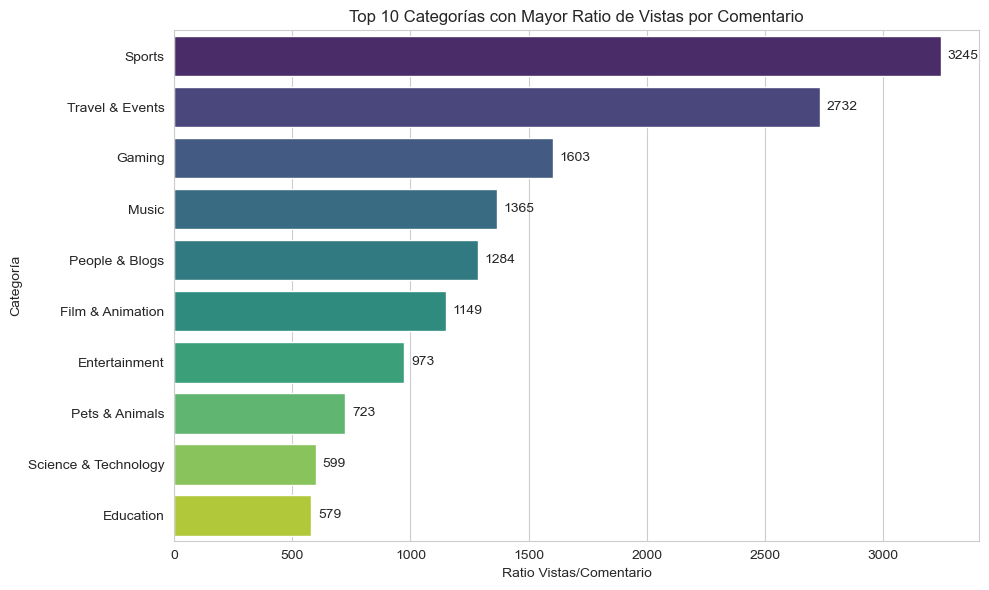

In [25]:
# Calcular ratio
data_limpia = data_limpia[data_limpia['comment_count'] > 0]
data_limpia['views_per_comment'] = data_limpia['views'] / data_limpia['comment_count']

# Agrupar por categoría
top_categorias = data_limpia.groupby('category_name')['views_per_comment'].mean().dropna().sort_values(ascending=False).head(10)
top_categorias = data_limpia[data_limpia['category_name'] != 'Sin categoría'] \
    .groupby('category_name')['views_per_comment'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)
# Graficar con etiquetas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="viridis")
plt.title("Top 10 Categorías con Mayor Ratio de Vistas por Comentario")
plt.xlabel("Ratio Vistas/Comentario")
plt.ylabel("Categoría")

# Añadir etiquetas numéricas
for i, valor in enumerate(top_categorias.values):
    ax.text(valor + 30, i, f"{valor:.0f}", va='center')

plt.tight_layout()
plt.show()

### Conclusión:

El análisis muestra que las categorías **"Sports"** y **"Travel & Events"** presentan el ratio más alto de vistas por comentario, lo que indica un gran alcance y visualización con relativamente baja participación en comentarios.  
Por otro lado, categorías como **"Education"** o **"Science & Technology"** tienen ratios más bajos, lo que sugiere una audiencia más participativa en comentarios en proporción al número de vistas.

---

### Recomendación para el negocio:

- Si el objetivo es **maximizar el alcance y visibilidad**, se recomienda enfocar la producción de contenido en categorías como **"Sports"** y **"Travel & Events"**, ya que permiten llegar a más personas por cada comentario recibido.

- Si la prioridad es **generar conversación o engagement profundo**, se sugiere apostar por categorías como **"Education"** o **"Science & Technology"**, donde los usuarios tienden a interactuar más activamente.

- Se recomienda además realizar pruebas A/B para comparar el rendimiento en función de los objetivos clave del negocio (branding, tráfico, conversiones, etc.).


5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\3322915393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['trending_date'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m', errors='coerce')


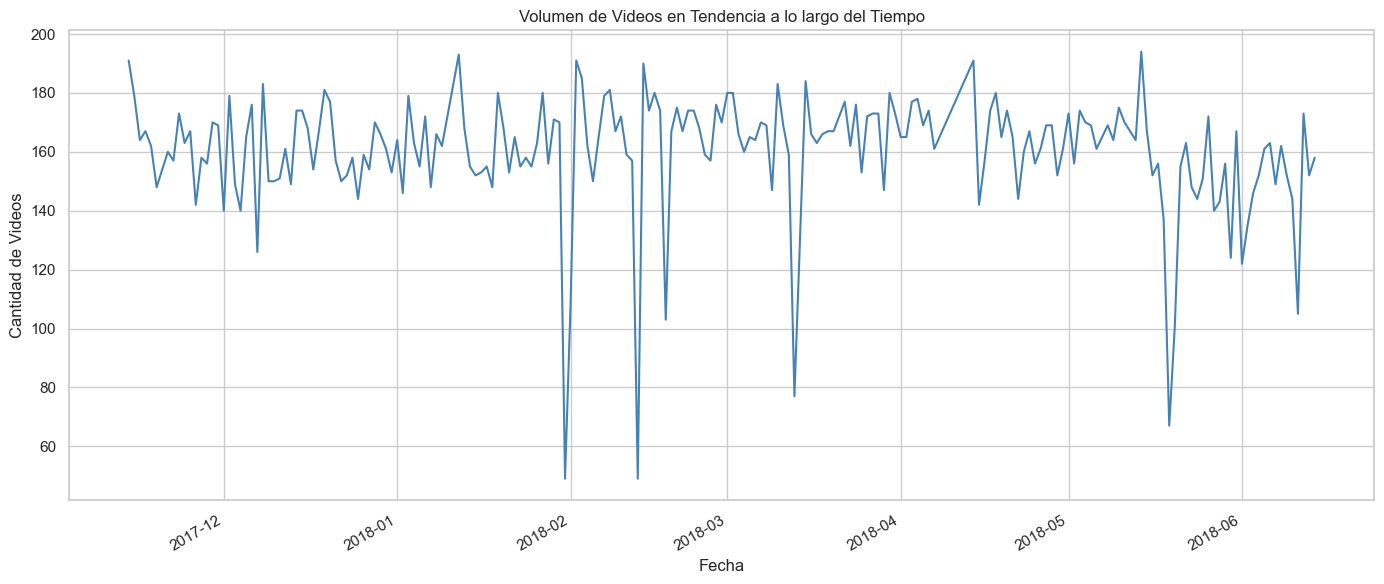

In [ ]:
# Convertir trending_date si no se hizo antes
data_limpia['trending_date'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m', errors='coerce')

# Agrupar y graficar
volumen_tiempo = data_limpia.groupby('trending_date').size()

plt.figure(figsize=(14, 6))
volumen_tiempo.plot(kind='line', color='steelblue')
plt.title("Volumen de Videos en Tendencia a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Videos")
plt.tight_layout()
plt.show()


### Conclusión:

El análisis del volumen de videos en tendencia muestra que, en general, **se mantiene una alta constancia diaria** de publicaciones, con un promedio de entre **140 y 180 videos por día**.  
Sin embargo, se observan **caídas bruscas** en la cantidad de videos en ciertas fechas, principalmente en los meses de:

- **Febrero 2018**  
- **Marzo 2018**  
- **Mayo y junio 2018**

Estas caídas pueden deberse a **problemas de recolección de datos, cambios en el algoritmo de tendencias de YouTube** o incluso a **eventos particulares como feriados o actualizaciones del sistema**.

---

### Recomendación para el negocio:

- Evitar realizar comparaciones directas de métricas en días donde el volumen total de videos fue **anormalmente bajo**, ya que podrían distorsionar los análisis.

- Para lograr mayor visibilidad, se sugiere **lanzar contenido en los días de mayor actividad (alta cantidad de videos en tendencia)**, ya que estos reflejan **una mayor audiencia activa**.

- Sería beneficioso para la empresa implementar una rutina de análisis que **detecte anomalías temporales** y las marque, para **excluirlas de modelos predictivos o de comportamiento**.


6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos
frecuencia?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\1201276803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_canales.values, y=top_canales.index, palette="magma")


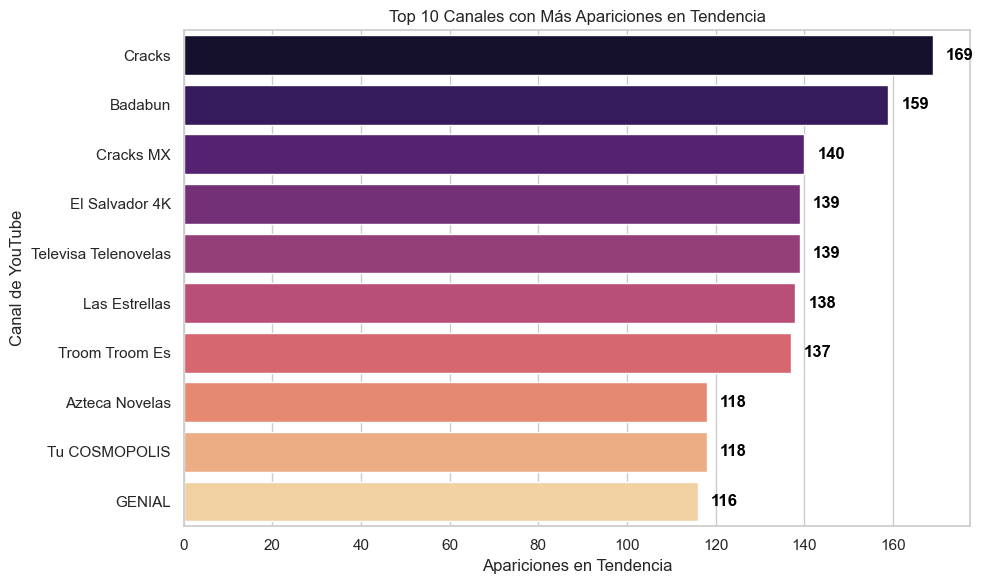

In [ ]:
# Top 10 canales con más apariciones
top_canales = data_limpia['channel_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_canales.values, y=top_canales.index, palette="magma")
plt.title("Top 10 Canales con Más Apariciones en Tendencia")
plt.xlabel("Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")

# Mostrar los valores al costado de cada barra
for i, value in enumerate(top_canales.values):
    ax.text(value + 3, i, str(value), va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\807480715.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='apariciones', y='channel_title', data=df_canales_muestra, palette='cubehelix')


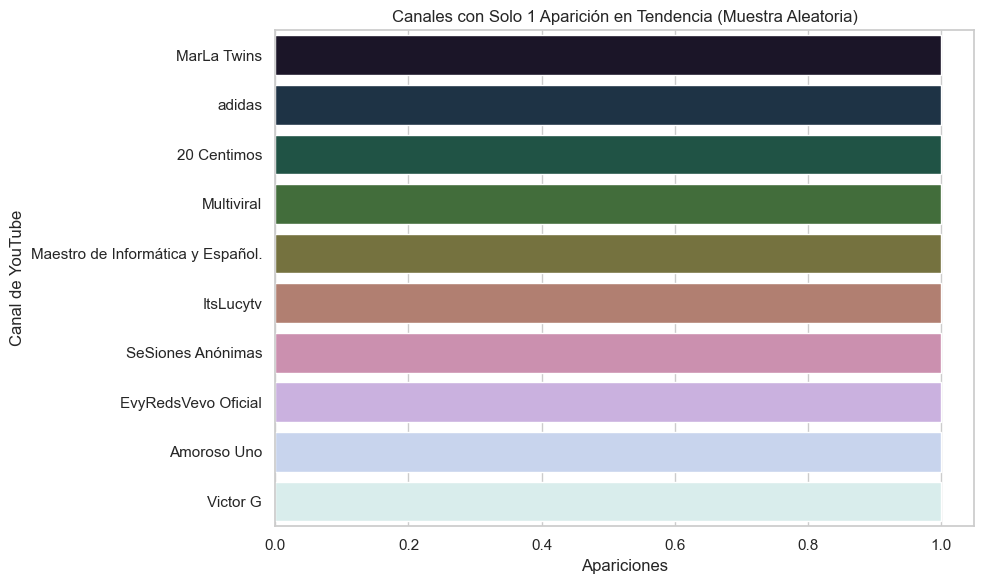

In [ ]:
# Canales con solo 1 aparición
canales_frecuencia = data_limpia['channel_title'].value_counts()
canales_una_aparicion = canales_frecuencia[canales_frecuencia == 1]

# Tomar muestra de 10 (puedes cambiar el número)
canales_muestra = canales_una_aparicion.sample(10, random_state=42)

# Convertir a DataFrame para graficar
df_canales_muestra = canales_muestra.reset_index()
df_canales_muestra.columns = ['channel_title', 'apariciones']

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='apariciones', y='channel_title', data=df_canales_muestra, palette='cubehelix')
plt.title("Canales con Solo 1 Aparición en Tendencia (Muestra Aleatoria)")
plt.xlabel("Apariciones")
plt.ylabel("Canal de YouTube")
plt.tight_layout()
plt.show()


### Análisis de Apariciones en Tendencia por Canal

#### Conclusión
El gráfico de los **Top 10 canales** revela que ciertos creadores, como **Cracks**, **Badabun** y **Cracks MX**, dominaron las tendencias con más de 140 apariciones cada uno. Esto sugiere una fuerte presencia en la plataforma y un contenido recurrentemente popular o viral. En contraste, el segundo gráfico muestra una muestra de canales con **solo una aparición** en tendencia, lo cual refleja una gran dispersión en el ecosistema de creadores, donde muchos apenas logran alcanzar visibilidad.

#### Recomendación al negocio
Se recomienda a la empresa cliente analizar los patrones de contenido, horarios de publicación y temáticas de los canales con más apariciones para **identificar factores de éxito replicables**. Además, sería valioso diseñar estrategias de colaboración con canales emergentes (de baja aparición) que tengan potencial, con el fin de diversificar el contenido y captar nuevas audiencias.


7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [12]:
data_limpia['state'] = data_limpia['state'].str.upper()

# Agrupar likes por estado y calcular coordenadas promedio
interacciones_estado = data_limpia.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'mean',
    'lon': 'mean'
}).reset_index()

# Crear el mapa
fig_likes = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='likes',
    size='likes',
    color_continuous_scale='plasma',
    labels={'likes': 'Likes'},
    title='México - Likes en Videos de YouTube por Estado'
)

fig_likes.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_likes.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_likes.show()

In [13]:
# Mapa de Vistas
fig_views = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='views',
    size='views',
    color_continuous_scale='viridis',
    labels={'views': 'Vistas'},
    title='México - Vistas en Videos de YouTube por Estado'
)
fig_views.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_views.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_views.show()

In [14]:
# Mapa de No me gusta
fig_dislikes = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='dislikes',
    size='dislikes',
    color_continuous_scale='reds',
    labels={'dislikes': 'No me gusta'},
    title='México - No me gusta en Videos de YouTube por Estado'
)
fig_dislikes.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_dislikes.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_dislikes.show()

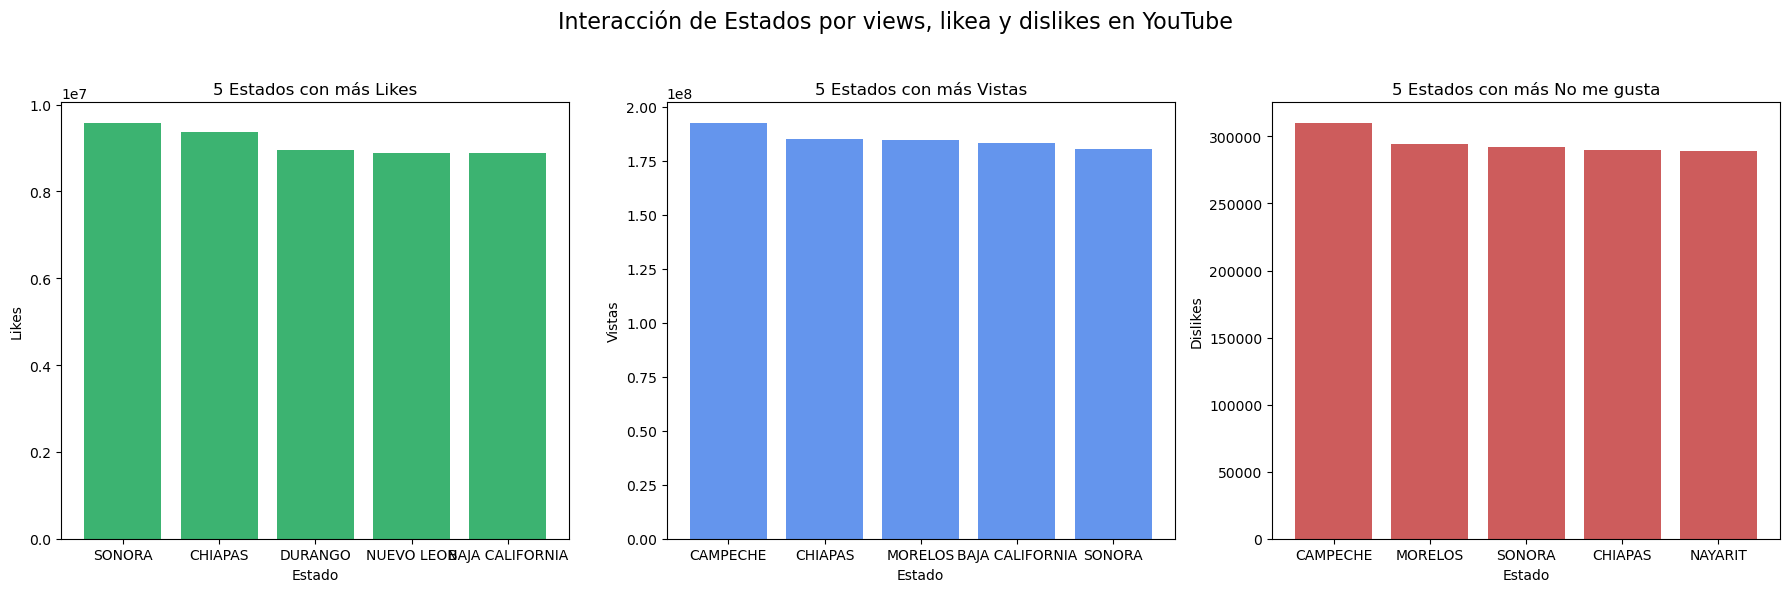

In [15]:
# Seleccionar los 5 estados con mayores valores en cada métrica
top5_likes = data_limpia.groupby('state')['likes'].sum().nlargest(5).reset_index()
top5_views = data_limpia.groupby('state')['views'].sum().nlargest(5).reset_index()
top5_dislikes = data_limpia.groupby('state')['dislikes'].sum().nlargest(5).reset_index()

# Crear figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de Likes
axs[0].bar(top5_likes['state'], top5_likes['likes'], color='mediumseagreen')
axs[0].set_title('5 Estados con más Likes')
axs[0].set_ylabel('Likes')
axs[0].set_xlabel('Estado')

# Gráfico de Views
axs[1].bar(top5_views['state'], top5_views['views'], color='cornflowerblue')
axs[1].set_title('5 Estados con más Vistas')
axs[1].set_ylabel('Vistas')
axs[1].set_xlabel('Estado')

# Gráfico de Dislikes
axs[2].bar(top5_dislikes['state'], top5_dislikes['dislikes'], color='indianred')
axs[2].set_title('5 Estados con más No me gusta')
axs[2].set_ylabel('Dislikes')
axs[2].set_xlabel('Estado')

# Ajustar presentación
plt.suptitle('Interacción de Estados por views, likea y dislikes en YouTube', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Análisis de las tendencias por Estado

#### Conclusión
Los gráficos muestran que los estados de *Morelos, Chiapas, Campeche, Sonora y Baja California* tienen una **alta interacción** en vistas, likes y dislikes, destacándose Sonora con el mayor número de likes (aproximadamente 9.7 millones) y Campeche con la mayor cantidad de vistas (aproximadamente 195 millones) y dislikes (aproximadamente 312 mil). Estos estados presentan un alto alcance de contenido y una fuerte reacción emocional, tanto positiva como negativa. En términos geográficos, las *zonas centro-norte* del país concentran gran parte de las vistas, con una polarización en los niveles de likes y dislikes. Por ejemplo, *Michoacán* tiene **más dislikes que likes**, mientras que *San Luis* Potosí tiene **más likes que dislikes**, ambos con vistas similares. El sur y sureste del país muestran menor participación, posiblemente por una infraestructura digital más limitada o menor producción de contenido local.


#### Recomendación al negocio
- Aplicar segmentación regional para campañas digitales. Se recomienda priorizar Morelos, Chiapas, Campeche, Sonora y Baja California como focos de inversión en publicidad, patrocinios o activaciones con influencers, ya que garantizan alto retorno de visibilidad y participación.
- Se recomienda analizar los temas o categorías de vídeos más vistos en los estados líderes de visualizaciones para replicar ese éxito en zonas de menor participación. 
- Evaluar la situación de infraestructura y recursos en estados con baja presencia en las métricas como Puebla, Colima y Guerrero, ya que pueden representar mercados con alto potencial de expansión.
- Los estados con altos niveles de dislikes deben ser analizados para comprender si la negatividad se debe al contenido, a la audiencia o al tipo de canal. Esta información puede ser usada para gestionar mejor la reputación de la empresa o el enfoque editorial de los contenidos. También ayudaría a crear nuevas políticas o cambios que incentiven la creación de contenido bien recibido por la comunidad.

8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

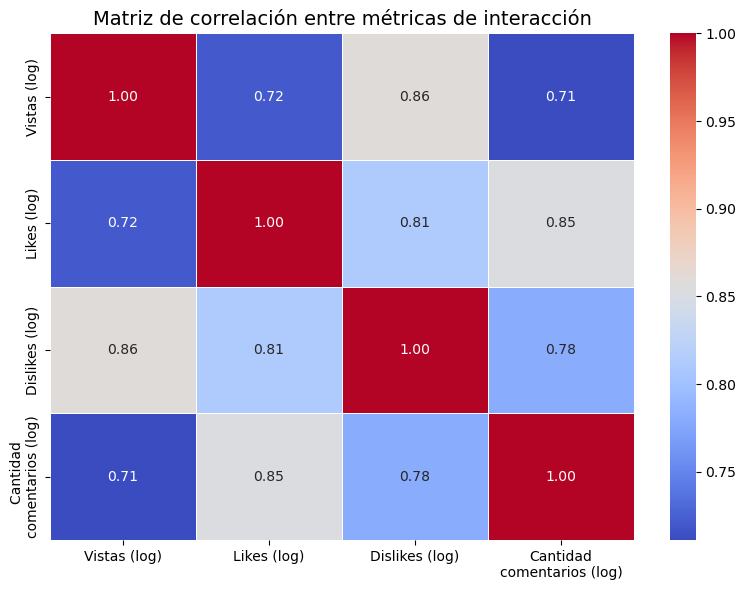

In [16]:
vars_log = ['views_log', 'likes_log', 'dislikes_log', 'comment_count_log']
corr_matrix = data_limpia[vars_log].corr()

# Rename columns and index for better labels in the heatmap
corr_matrix = corr_matrix.rename(columns={
    'views_log': 'Vistas (log)',
    'likes_log': 'Likes (log)',
    'dislikes_log': 'Dislikes (log)',
    'comment_count_log': 'Cantidad\ncomentarios (log)'
}, index={
    'views_log': 'Vistas (log)',
    'likes_log': 'Likes (log)',
    'dislikes_log': 'Dislikes (log)',
    'comment_count_log': 'Cantidad      \ncomentarios (log)'
})


# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre métricas de interacción', fontsize=14)
plt.tight_layout()
plt.show()

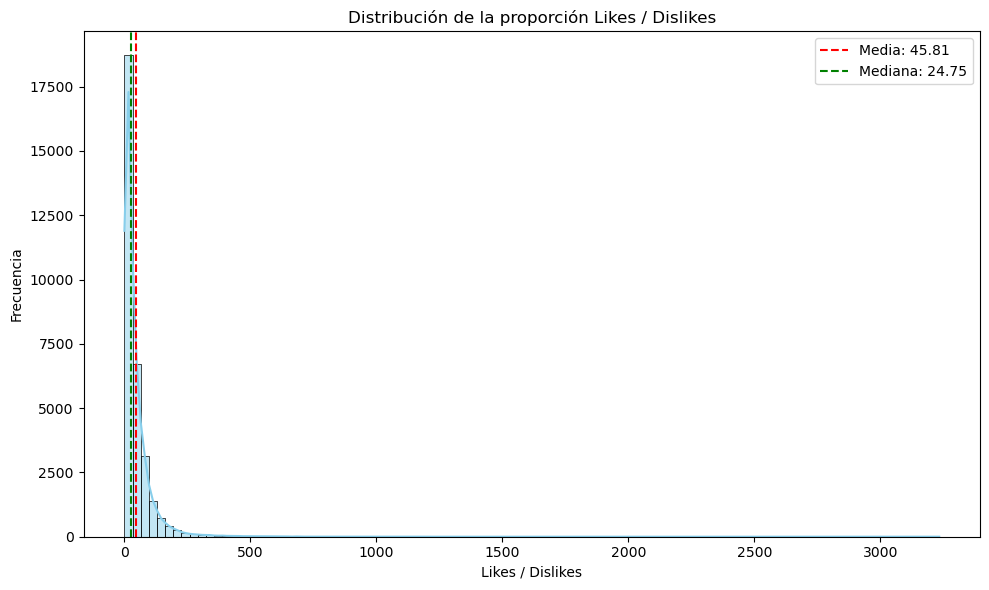

In [17]:
# Calcular el ratio likes/dislikes, evitando división por cero
data_limpia['ratio_likes_dislikes'] = data_limpia.apply(
    lambda row: row['likes'] / row['dislikes'] if row['dislikes'] != 0 else np.nan, axis=1
)

# Calcular media y mediana del ratio bruto
media_ratio = data_limpia['ratio_likes_dislikes'].mean()
mediana_ratio = data_limpia['ratio_likes_dislikes'].median()

# Histograma para visualizar la distribución del ratio
plt.figure(figsize=(10, 6))

sns.histplot(data_limpia['ratio_likes_dislikes'].dropna(), bins=100, color='skyblue', kde=True) # Using dropna() to handle NaN values
plt.axvline(media_ratio, color='red', linestyle='--', label=f'Media: {media_ratio:.2f}')
plt.axvline(mediana_ratio, color='green', linestyle='--', label=f'Mediana: {mediana_ratio:.2f}')
plt.title('Distribución de la proporción Likes / Dislikes')
plt.xlabel('Likes / Dislikes')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
data_limpia['ratio_likes_dislikes_logdiff'] = data_limpia['likes_log'] - data_limpia['dislikes_log']
correlation_views_ratio = data_limpia['views_log'].corr(data_limpia['ratio_likes_dislikes_logdiff'], method='spearman')

print(f"Correlación de Spearman entre Vistas (log) y Proporción Likes/Dislikes (log): {correlation_views_ratio:.6f}")

Correlación de Spearman entre Vistas (log) y Proporción Likes/Dislikes (log): 0.021569


### Análisis de las tendencias por Estado

#### Conclusión
Los videos en tendencia de YouTube generan una alta interacción por parte del público, tanto positiva como negativa. El heatmap de correlación reveló relaciones fuertes y positivas entre el número de vistas y las métricas de interacción: **likes (r = 0,71), dislikes (r = 0,85) y comentarios (r = 0,68)**. Esto indica que, *a medida que un video se vuelve más popular, también incrementan sus reacciones y participación*. Sin embargo, al analizar la proporción de likes/dislikes, se encontró que, aunque la mayoría de videos tienen una relación favorable (una mediana de aproximadamente 24:1), esta proporción no varía significativamente con el crecimiento de las vistas, dado que presenta un coeficiente de correlación de Spearman de 0,032. En otras palabras, la percepción del contenido es independiente a su alcance. Esto sugiere que la visibilidad no altera en gran medida la valoración del contenido, sino que simplemente aumenta su exposición a diferentes tipos de reacción.


#### Recomendación al negocio
- Promover vídeos que mantengan o superen la proporción promedio de 22 likes por dislike, ya que tienden a recibir más comentarios positivos y generan una comunidad amena y amigable.
- No asociar la tendencia con la aprobación automática de los usuarios. Según lo planteado, aunque un video sea popular, no siempre implica aceptación total. Es clave analizar la proporción de reacciones, no solo su volumen. 
- Considerar la proporción de likes/dislikes como indicador clave (KPI) para evaluar la percepción de campañas, lanzamientos o promoción de influencers. 
- Atraer y mantener audiencias mediante contenido que no solo sea visto, sino también valorado positivamente, de modo que, tenga un mayor alcance en la comunidad.

9. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\3977931706.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_limpia['publish_hour'] = pd.to_datetime(data_limpia['publish_time']).dt.hour


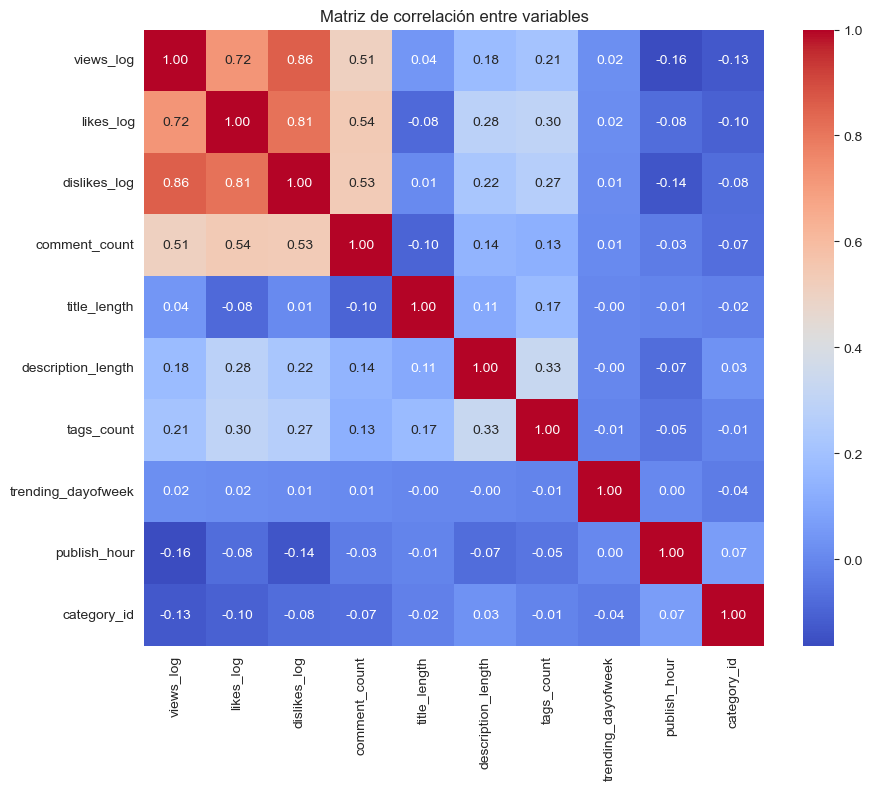

In [29]:
# Crear nuevas variables
data_limpia['title_length'] = data_limpia['title'].apply(len)
data_limpia['description_length'] = data_limpia['description'].apply(len)
data_limpia['tags_count'] = data_limpia['tags'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

# Convertir trending_date a día de la semana
data_limpia['trending_dayofweek'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m').dt.dayofweek

# Convertir publish_time a hora del día
data_limpia['publish_hour'] = pd.to_datetime(data_limpia['publish_time']).dt.hour

# Si tuvieras una variable "state" (por estado geográfico), asegúrate que sea numérica o la puedes excluir del heatmap

# Selección de variables para matriz de correlación
cols_correlacion = [
    'views_log', 'likes_log', 'dislikes_log', 'comment_count',
    'title_length', 'description_length', 'tags_count',
    'trending_dayofweek', 'publish_hour', 'category_id'
]

# Calcular matriz de correlación
correlation_matrix = data_limpia[cols_correlacion].corr()

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

### Análisis de la factibilidad de predecir “Vistas” o “Me gusta” o “No me gusta”

#### Conclusión
Los resultados evidencian que las interacciones del público (likes, dislikes, comentarios) están estrechamente relacionadas entre sí y con las vistas, lo que las convierte en buenos predictores mutuos. En contraste, variables de contenido como el largo del título o la hora de publicación no muestran relación significativa con el éxito de un video. Esto sugiere que la popularidad de un video depende más de factores sociales y virales que de características formales del contenido o del canal.

#### Recomendación al negocio
- Aprovechar y estudiar las descripciones y etiquetas, pues, pese a que no tienen correlaciones muy altas, sí presentan una influencia leve, por lo que pueden usarse estratégicamente para mejorar visibilidad. 
- Usar modelos predictivos basados en interacciones anteriores (comentarios, likes) para estimar el posible éxito de futuros contenidos. 
- Explorar otras variables externas como duración del video, presencia de influencers, o campañas de promoción cruzada, que podrían explicar mejor el rendimiento.

## **MODELADO**

Como técnica de modelado, se escogió la regresión lineal. Dado que se busca generar un modelo de predicción para vistas, me gusta y no me gusta, a fin de estimar el posible éxito o tendencia de un video de YouTube en México, la regresión lineal es un modelo relativamente simple, fácil de implementar y rápido de entrenar. Estas características son útiles para procesar la gran cantidad de datos con los que cuenta el dataset. Nos permitirá identificar si las variables **predictoras seleccionadas (comment_count, description_length y tags_count)** son verdaderamente lineales o solo estiman a una aproximación.

Además, ya que se considerará variables cuantitativas, es importante asegurar una visión clara y directa del impacto de las variables seleccionadas. Un modelo de regresión lineal proporciona coeficientes para cada variable predictora que representan el efecto promedio que tiene esa variable sobre la **variable objetivo (views, likes y dislikes)**.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
X = data_limpia[['comment_count', 'description_length', 'tags_count']]
y1 = data_limpia['views_log']
y2 = data_limpia['likes_log']
y3 = data_limpia['dislikes_log']

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=101)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.3, random_state=101)

In [32]:
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

LinearRegression()

In [33]:
slope_1 = lm1.coef_
intercept_1 = lm1.intercept_

slope_2 = lm2.coef_
intercept_2 = lm2.intercept_

slope_3 = lm3.coef_
intercept_3 = lm3.intercept_

print("PARA VIEWS (CON TRANSFORMACIÓN LOGARÍTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_1)
print("- El término independiente de la recta 'w0' es: ", intercept_1)

print("\nPARA LIKES (CON TRANSFORMACIÓN LOGARÍTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_2)
print("- El término independiente de la recta 'w0' es: ", intercept_2)

print("\nPARA DISLIKES (CON TRANSFORMACIÓN LOGARÍTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_3)
print("- El término independiente de la recta 'w0' es: ", intercept_3)

PARA VIEWS (CON TRANSFORMACIÓN LOGARÍTMICA)
- Las pendientes 'w1' del modelo son:  [0.00026191 0.00011812 0.01433066]
- El término independiente de la recta 'w0' es:  10.189275514522695

PARA LIKES (CON TRANSFORMACIÓN LOGARÍTMICA)
- Las pendientes 'w1' del modelo son:  [0.00036609 0.00040756 0.03124494]
- El término independiente de la recta 'w0' es:  5.911554656183151

PARA DISLIKES (CON TRANSFORMACIÓN LOGARÍTMICA)
- Las pendientes 'w1' del modelo son:  [0.00030302 0.00019966 0.02385328]
- El término independiente de la recta 'w0' es:  3.1790867532060902


In [34]:
coef_df1 = pd.DataFrame(lm1.coef_,X.columns,columns=['Coeficiente'])
coef_df1

,Coeficiente
comment_count,0.000262
description_length,0.000118
tags_count,0.014331


In [35]:
coef_df2 = pd.DataFrame(lm2.coef_,X.columns,columns=['Coeficiente'])
coef_df2

,Coeficiente
comment_count,0.000366
description_length,0.000408
tags_count,0.031245


In [36]:
coef_df3 = pd.DataFrame(lm3.coef_,X.columns,columns=['Coeficiente'])
coef_df3

,Coeficiente
comment_count,0.000303
description_length,0.000200
tags_count,0.023853


|index|Coeficiente (vistas)|Coeficiente (likes)|Coeficiente (dislikes)|
|---|---|---|---|
|comment\_count|0\.000260|0\.000368|0\.000302|
|description\_length|0\.000141|0\.000440|0\.000224|
|tags\_count|0\.015379|0\.032604|0\.025164|

##### **INTERPRETACIÓN DE RESULTADOS**

**Respecto a vistas**
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, está asociado con un incremento de **0.000260** en la *cantidad de comentarios*.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, está asociado con un incremento de **0.000141** en la *longitud de la descripción* en palabras.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, está asociado con un incremento de **0.015379** en la *cantidad de tags* incluidos.

**Respecto a me gusta**
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, está asociado con un incremento de **0.000368** en la *cantidad de comentarios*.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, está asociado con un incremento de **0.000440** en la *longitud de la descripción* en palabras.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, está asociado con un incremento de **0.032604** en la *cantidad de tags* incluidos.

**Respecto a no me gusta**
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, está asociado con un incremento de **0.000302** en la *cantidad de comentarios*.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, está asociado con un incremento de **0.000224** en la *longitud de la descripción* en palabras.
- Manteniendo todas las demás características fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, está asociado con un incremento de **0.025164** en la *cantidad de tags* incluidos.

In [37]:
views_log_pred = lm1.predict(X1_test)
likes_log_pred = lm2.predict(X2_test)
dislikes_log_pred = lm3.predict(X3_test)

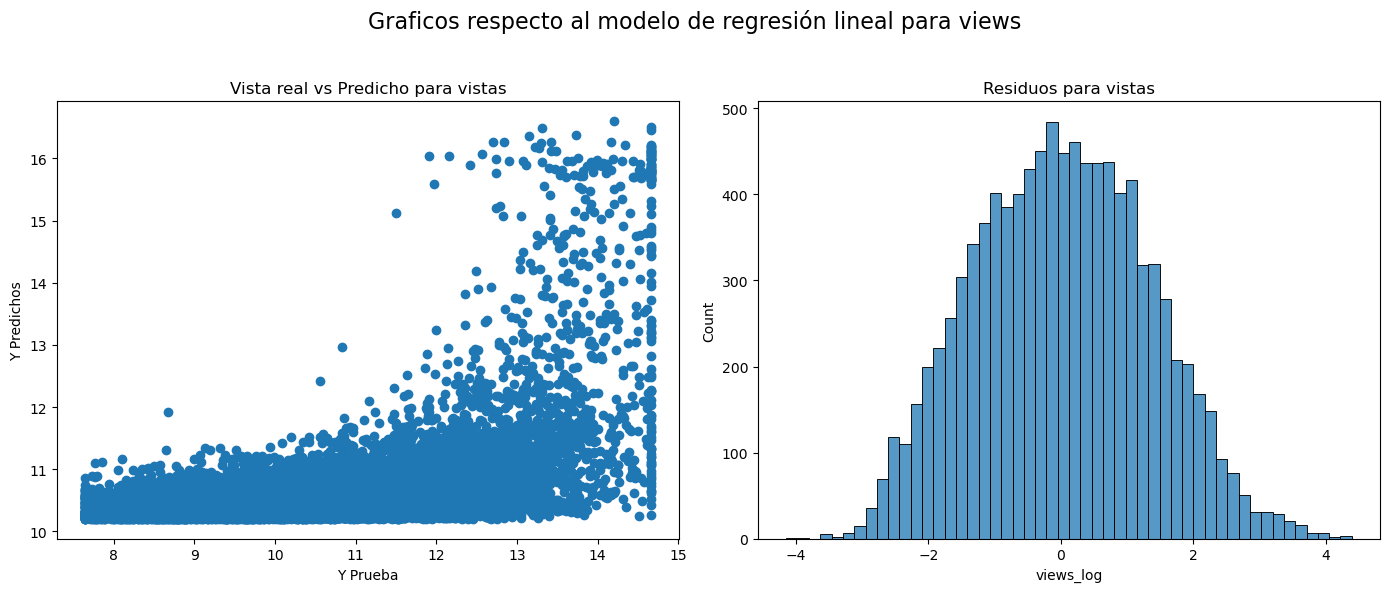

In [29]:
# Crear figura con 2 subplots para views
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de vista real
axs[0].scatter(y1_test,views_log_pred)
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para vistas')

# Gráfico de residuos
sns.histplot((y1_test-views_log_pred),bins=50, ax=axs[1])
axs[1].set_title('Residuos para vistas')


# Ajustar presentación
plt.suptitle('Graficos respecto al modelo de regresión lineal para views', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

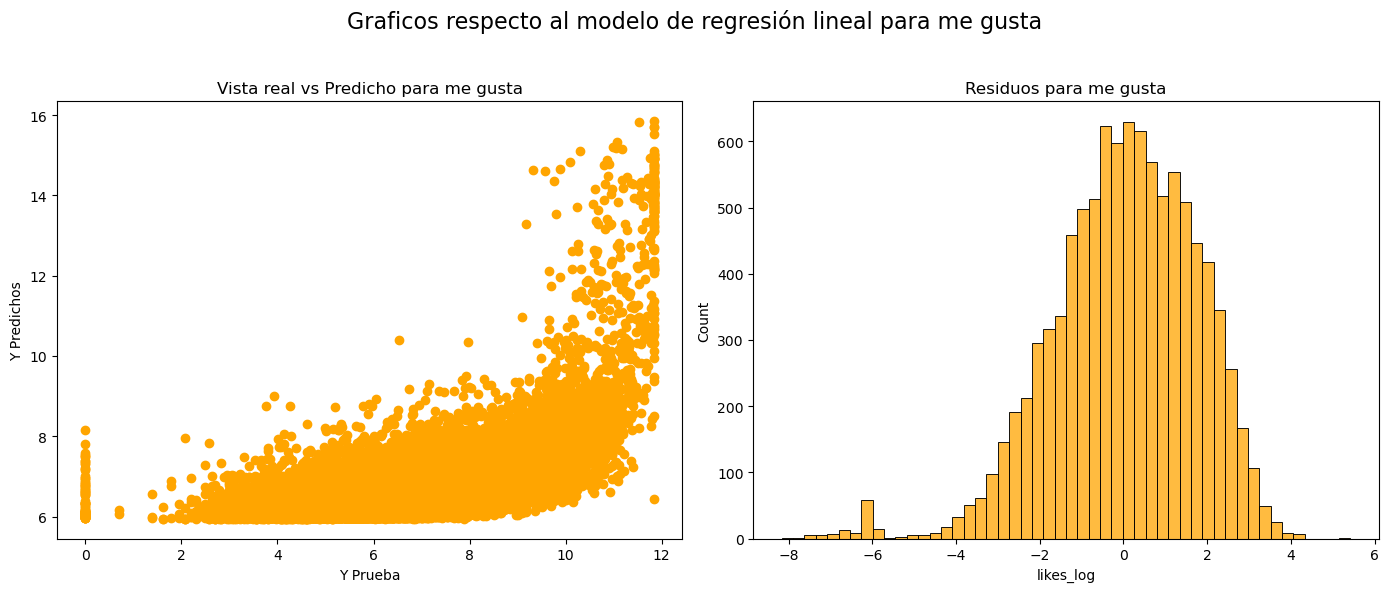

In [30]:
# Crear figura con 2 subplots para likes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de vista real
axs[0].scatter(y2_test,likes_log_pred,color='orange')
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para me gusta')

# Gráfico de residuos
sns.histplot((y2_test-likes_log_pred),bins=50, ax=axs[1],color='orange')
axs[1].set_title('Residuos para me gusta')


# Ajustar presentación
plt.suptitle('Graficos respecto al modelo de regresión lineal para me gusta', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

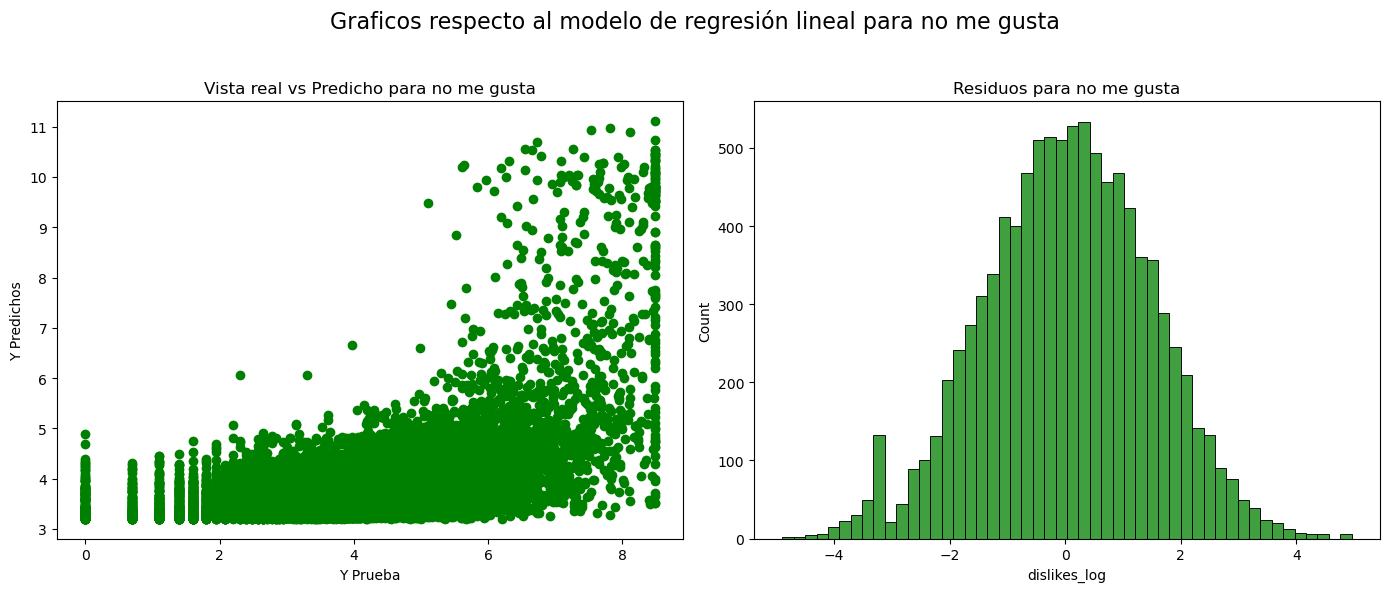

In [31]:
# Crear figura con 2 subplots para likes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de vista real
axs[0].scatter(y3_test,dislikes_log_pred,color='green')
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para no me gusta')

# Gráfico de residuos
sns.histplot((y3_test-dislikes_log_pred),bins=50, ax=axs[1],color='green')
axs[1].set_title('Residuos para no me gusta')


# Ajustar presentación
plt.suptitle('Graficos respecto al modelo de regresión lineal para no me gusta', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Función para calcular y mostrar métricas
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\nMétricas para {model_name}:")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAE (Error Absoluto Medio): {mae:.4f}")

# Evaluar los tres modelos
evaluate_model(y1_test, views_log_pred, "Views (log)")
evaluate_model(y2_test, likes_log_pred, "Likes (log)")
evaluate_model(y3_test, dislikes_log_pred, "Dislikes (log)")


Métricas para Views (log):
- MSE: 1.7482
- RMSE: 1.3222
- MAE (Error Absoluto Medio): 1.0814

Métricas para Likes (log):
- MSE: 2.9856
- RMSE: 1.7279
- MAE (Error Absoluto Medio): 1.3613

Métricas para Dislikes (log):
- MSE: 2.1134
- RMSE: 1.4538
- MAE (Error Absoluto Medio): 1.1621
